# Polynomial Regression

For non-linear relationships

In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns   
sns.set(color_codes=True)
import matplotlib.pyplot as plt 
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
X = boston['DIS'].values
y = boston['NOX'].values

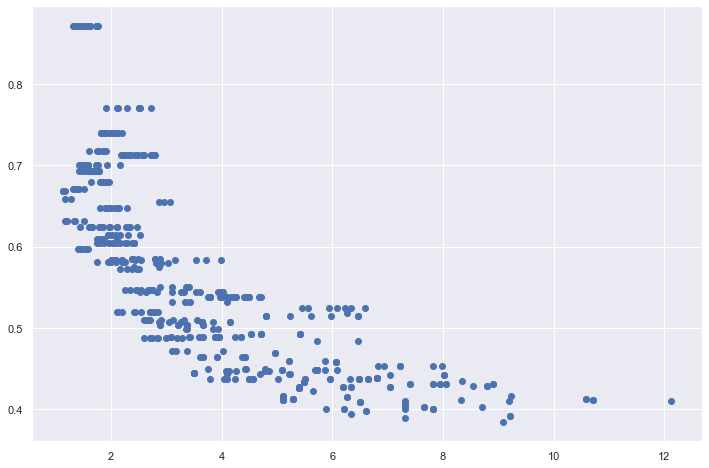

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X, y)

## Quadratic

In [14]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X.reshape(-1, 1))
lr = LinearRegression()
lr.fit(X_poly_b, y)

LinearRegression()

In [18]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

0.6998562064647851

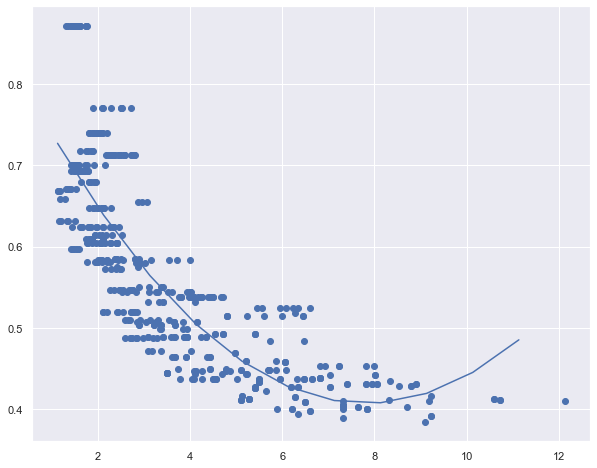

In [22]:
y_pred = lr.predict(poly_reg.fit_transform(X_fit.reshape(-1, 1)))
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X_fit, y_pred)
r2_score(y, lr.predict(X_poly_b))

## Cubic

0.7147737433422647

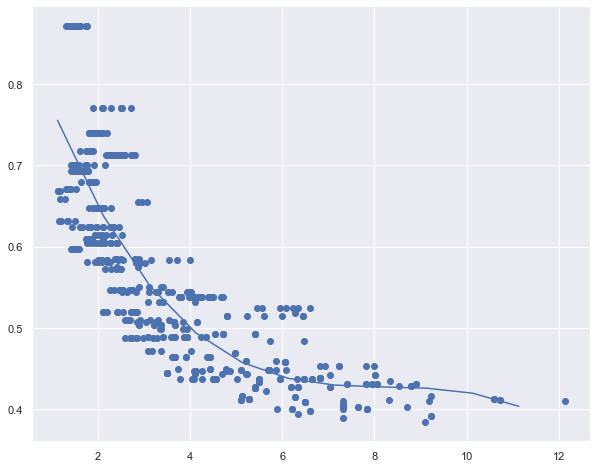

In [23]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X.reshape(-1, 1))
lr = LinearRegression()
lr.fit(X_poly_b, y)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X_fit

y_pred = lr.predict(poly_reg.fit_transform(X_fit.reshape(-1, 1)))
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X_fit, y_pred)
r2_score(y, lr.predict(X_poly_b))